In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

69.93501590244327 19.100504527550356
86.24791878964729 -81.69578986679848
79.24400284011827 -140.26014541037551
-16.692697194545815 33.79181436325857
-59.96752395644167 -50.388547099692715
81.19874850964459 33.97053864389849
62.3227966346013 14.553948782916876
-57.239763622033934 -146.67522231934765
-2.5665185542014655 161.0464178204121
-56.42137724889636 83.26516241469312
-89.76532460282358 88.03268678537796
10.026693778321231 -162.30692941635715
-53.52692554880452 21.472982204220813
-48.12129778408677 136.04873317429815
23.568249458238867 -28.855627857157856
-89.77934270465757 -69.63740448538704
89.75240107087618 97.70587501673464
-69.03098941970154 160.94597930250688
-29.94630817656047 80.65632460871734
24.96164831689582 30.991069495402257
-81.03285390168557 -32.17419770005722
28.58835286114936 25.430839837868575
-36.59614609776289 -165.59932472512043
25.3088384979215 -122.30542604455904
-38.31914009202698 97.7323750669139
-76.61271750746121 162.25470642683473
15.831696241726931 68.

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

626

In [7]:
import requests

requests.__version__

'2.27.1'

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# print(url)

In [10]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)        
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    break
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | amderma
City not found. Skipping...
Processing Record 3 of Set 1 | hithadhoo
Processing Record 4 of Set 1 | upernavik
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | laurel
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 10 of Set 1 | bushehr
Processing Record 11 of Set 1 | pedernales
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | bandarbeyla
Processing Record 14 of Set 1 | cabo san lucas
Processing Record 15 of Set 1 | cabinda
Processing Record 16 of Set 1 | poddorye
Processing Record 17 of Set 1 | okhotsk
Processing Record 18 of Set 1 | port lincoln
Processing Record 19 of Set 1 | avarua
Processing Record 20 of Set 1 | tsihombe
City not found. Skipping...
Processin

Processing Record 38 of Set 4 | mar del plata
Processing Record 39 of Set 4 | tazovskiy
Processing Record 40 of Set 4 | laguna
Processing Record 41 of Set 4 | pontianak
Processing Record 42 of Set 4 | matagami
Processing Record 43 of Set 4 | port hardy
Processing Record 44 of Set 4 | kanigoro
Processing Record 45 of Set 4 | saleaula
City not found. Skipping...
Processing Record 46 of Set 4 | stykkisholmur
Processing Record 47 of Set 4 | baie-saint-paul
Processing Record 48 of Set 4 | waipawa
Processing Record 49 of Set 4 | henties bay
Processing Record 50 of Set 4 | qasigiannguit
Processing Record 1 of Set 5 | constitucion
Processing Record 2 of Set 5 | yulara
Processing Record 3 of Set 5 | kotka
Processing Record 4 of Set 5 | mahebourg
Processing Record 5 of Set 5 | yenagoa
Processing Record 6 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 7 of Set 5 | fergus falls
Processing Record 8 of Set 5 | lagoa
Processing Record 9 of Set 5 | cururupu
Processing Record 10 o

Processing Record 26 of Set 8 | harper
Processing Record 27 of Set 8 | vila franca do campo
Processing Record 28 of Set 8 | mbarara
Processing Record 29 of Set 8 | niamey
Processing Record 30 of Set 8 | aklavik
Processing Record 31 of Set 8 | denpasar
Processing Record 32 of Set 8 | conceicao do araguaia
Processing Record 33 of Set 8 | mponela
Processing Record 34 of Set 8 | mitu
Processing Record 35 of Set 8 | ambodifototra
City not found. Skipping...
Processing Record 36 of Set 8 | maryville
Processing Record 37 of Set 8 | namatanai
Processing Record 38 of Set 8 | rundu
Processing Record 39 of Set 8 | tukums
Processing Record 40 of Set 8 | kristiansund
Processing Record 41 of Set 8 | pimenta bueno
Processing Record 42 of Set 8 | brewster
Processing Record 43 of Set 8 | fare
Processing Record 44 of Set 8 | lavrentiya
Processing Record 45 of Set 8 | itoman
Processing Record 46 of Set 8 | volchansk
Processing Record 47 of Set 8 | gornopravdinsk
Processing Record 48 of Set 8 | naze
Proce

Processing Record 13 of Set 12 | clevedon
Processing Record 14 of Set 12 | matara
Processing Record 15 of Set 12 | coahuayana
Processing Record 16 of Set 12 | ostrovnoy
Processing Record 17 of Set 12 | tura
Processing Record 18 of Set 12 | grand river south east
City not found. Skipping...
Processing Record 19 of Set 12 | leningradskiy
Processing Record 20 of Set 12 | sadon
Processing Record 21 of Set 12 | yar-sale
Processing Record 22 of Set 12 | porto novo
Processing Record 23 of Set 12 | faya
Processing Record 24 of Set 12 | marquette
Processing Record 25 of Set 12 | imbituba
Processing Record 26 of Set 12 | camocim
Processing Record 27 of Set 12 | kingsport
Processing Record 28 of Set 12 | korla
Processing Record 29 of Set 12 | barawe
City not found. Skipping...
Processing Record 30 of Set 12 | kolpashevo
Processing Record 31 of Set 12 | morondava
Processing Record 32 of Set 12 | suruc
Processing Record 33 of Set 12 | hofn
Processing Record 34 of Set 12 | sainte-thecle
Processing R

In [10]:
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Mataura,NZ,2022-08-01 23:56:45,-46.1927,168.8643,52.07,78,89,8.84
1,1,Hithadhoo,MV,2022-08-01 23:56:45,-0.6000,73.0833,80.51,71,99,13.76
2,2,Upernavik,GL,2022-08-01 23:56:45,72.7868,-56.1549,46.13,71,100,3.85
3,3,Laurel,US,2022-08-01 23:54:36,39.0993,-76.8483,85.60,73,75,3.44
4,4,Jamestown,US,2022-08-01 23:56:46,42.0970,-79.2353,75.72,57,40,11.50
...,...,...,...,...,...,...,...,...,...,...
553,553,Oriximina,BR,2022-08-02 00:12:00,-1.7656,-55.8661,76.86,86,53,4.32
554,554,Susangerd,IR,2022-08-02 00:12:00,31.5608,48.1831,98.19,43,11,5.86
555,555,Tsumeb,NaN,2022-08-02 00:12:00,-19.2333,17.7167,54.45,25,3,9.04
556,556,Cedar City,US,2022-08-02 00:10:00,37.6775,-113.0619,81.57,36,0,16.11


In [11]:
# # Convert the array of dictionaries to a Pandas DataFrame.
# city_data_df = pd.DataFrame(city_data)
# city_data_df.head(10)

In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2022-08-01 23:56:45,-46.1927,168.8643,52.07,78,89,8.84
1,Hithadhoo,MV,2022-08-01 23:56:45,-0.6000,73.0833,80.51,71,99,13.76
2,Upernavik,GL,2022-08-01 23:56:45,72.7868,-56.1549,46.13,71,100,3.85
3,Laurel,US,2022-08-01 23:54:36,39.0993,-76.8483,85.60,73,75,3.44
4,Jamestown,US,2022-08-01 23:56:46,42.0970,-79.2353,75.72,57,40,11.50
5,Bluff,NZ,2022-08-01 23:56:46,-46.6000,168.3333,53.46,64,51,19.13
6,Bushehr,IR,2022-08-01 23:56:47,28.9684,50.8385,93.24,60,84,5.82
7,Pedernales,DO,2022-08-01 23:56:47,18.0384,-71.7440,83.77,72,16,0.58
8,Albany,US,2022-08-01 23:53:05,42.6001,-73.9662,79.88,61,76,4.79
9,Bandarbeyla,SO,2022-08-01 23:56:47,9.4942,50.8122,75.51,80,11,27.22


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

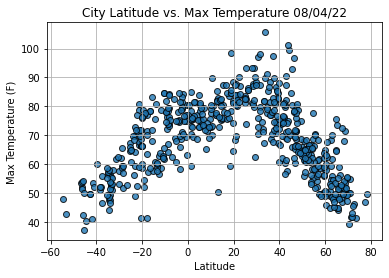

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

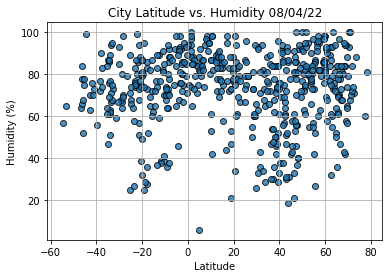

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

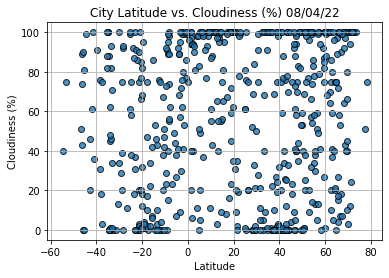

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

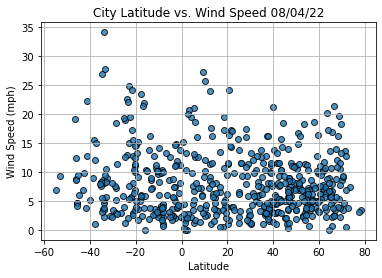

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Mataura,NZ,2022-08-01 23:56:45,-46.1927,168.8643,52.07,78,89,8.84
1,1,Hithadhoo,MV,2022-08-01 23:56:45,-0.6000,73.0833,80.51,71,99,13.76
2,2,Upernavik,GL,2022-08-01 23:56:45,72.7868,-56.1549,46.13,71,100,3.85
3,3,Laurel,US,2022-08-01 23:54:36,39.0993,-76.8483,85.60,73,75,3.44
4,4,Jamestown,US,2022-08-01 23:56:46,42.0970,-79.2353,75.72,57,40,11.50
...,...,...,...,...,...,...,...,...,...,...
553,553,Oriximina,BR,2022-08-02 00:12:00,-1.7656,-55.8661,76.86,86,53,4.32
554,554,Susangerd,IR,2022-08-02 00:12:00,31.5608,48.1831,98.19,43,11,5.86
555,555,Tsumeb,NaN,2022-08-02 00:12:00,-19.2333,17.7167,54.45,25,3,9.04
556,556,Cedar City,US,2022-08-02 00:10:00,37.6775,-113.0619,81.57,36,0,16.11


In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13] 
index13

City_ID                        13
City                      Okhotsk
Country                        RU
Date          2022-08-01 23:56:48
Lat                       59.3833
Lng                         143.3
Max Temp                    58.42
Humidity                       87
Cloudiness                     82
Wind Speed                   4.94
Name: 13, dtype: object

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,2,Upernavik,GL,2022-08-01 23:56:45,72.7868,-56.1549,46.13,71,100,3.85
3,3,Laurel,US,2022-08-01 23:54:36,39.0993,-76.8483,85.60,73,75,3.44
4,4,Jamestown,US,2022-08-01 23:56:46,42.0970,-79.2353,75.72,57,40,11.50
6,6,Bushehr,IR,2022-08-01 23:56:47,28.9684,50.8385,93.24,60,84,5.82
7,7,Pedernales,DO,2022-08-01 23:56:47,18.0384,-71.7440,83.77,72,16,0.58


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

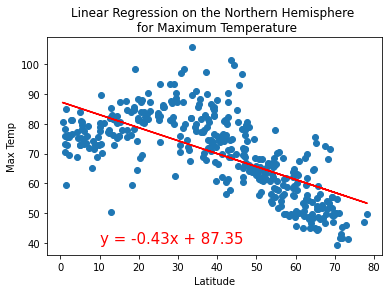

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

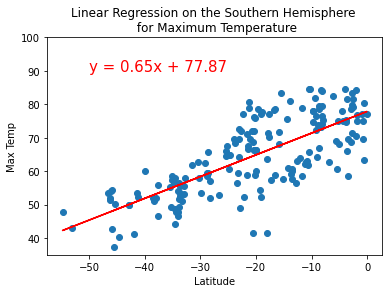

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.ylim(35, 100)


# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

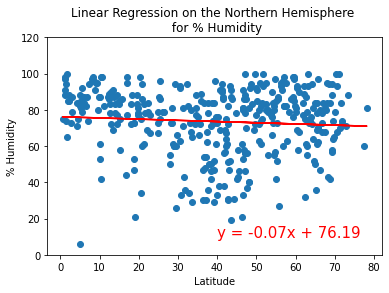

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.ylim(0,120)

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

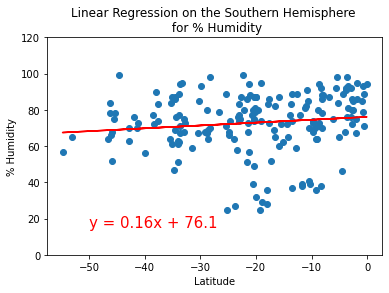

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.ylim(0, 120)

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

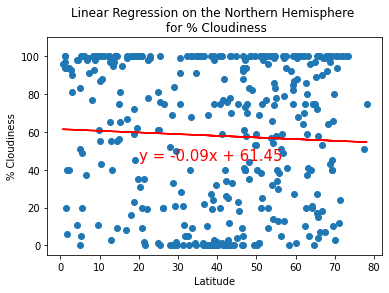

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.ylim(-5, 110)
# plt.text()

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(20,45))

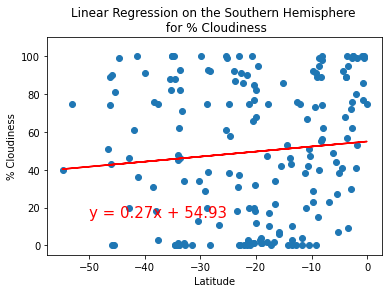

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.ylim(-5, 110)

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,15))

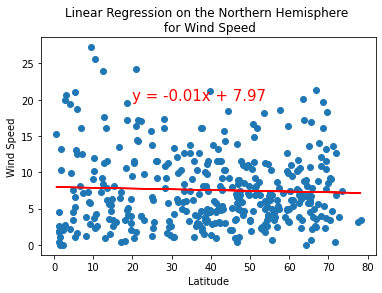

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(20,20), )

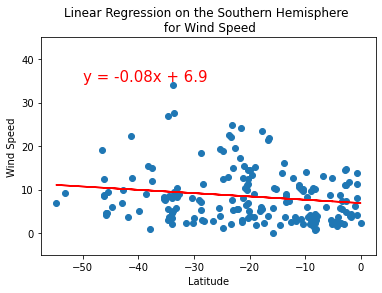

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.ylim(-5,45)

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))